In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
np.random.seed(0)

In [2]:
def plot_graph(G):

    room_nodes = [node for node in G.nodes if node.startswith("room")]
    poster_nodes = [node for node in G.nodes if node.startswith("poster")]
    hallway_nodes = [node for node in G.nodes if node.startswith("hw")]
    room_edges = [(u,v) for (u,v) in G.edges if u.startswith("room") and v.startswith("room")]
    hallway_edges = [(u,v) for (u,v) in G.edges if u.startswith("hw") or v.startswith("hw")]
    poster_edges = [(u,v) for (u,v) in G.edges if u.startswith("poster") or v.startswith("poster")]

    pos=nx.get_node_attributes(G,'pos')
    room_labels = nx.get_node_attributes(G,'room_name')
    poster_labels = nx.get_node_attributes(G,'name')

    fig, ax = plt.subplots(figsize=(12, 12))
    nx.draw_networkx_nodes(G, pos, nodelist=poster_nodes, node_color="tab:blue", node_size=100)
    nx.draw_networkx_nodes(G, pos, nodelist=room_nodes, node_color="tab:red")
    nx.draw_networkx_nodes(G, pos, nodelist=hallway_nodes, node_color="tab:green")

    nx.draw_networkx_edges(G, pos, width=2.0, alpha=1.0, edgelist=room_edges)
    nx.draw_networkx_edges(G, pos, width=2.0, alpha=1.0, edgelist=hallway_edges)
    nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edgelist=poster_edges)

    nx.draw_networkx_labels(G, pos, labels = room_labels)
    nx.draw_networkx_labels(G, pos, labels = poster_labels)



In [3]:
data = np.loadtxt("./sample_inputs/poster_data.csv", skiprows=1, dtype=str, delimiter=",")
poster_names, keywords_1, keywords_2 = data[:,0], data[:,1], data[:,2]
n_posters = len(poster_names)

In [4]:
G = nx.Graph()

rooms = [
    ("room_00", {"pos": [0.0, 0.0], "room_name": "Stuttgart", "n_posters": 8}),
    ("room_01", {"pos": [0.0, 1.0], "room_name": "Bad Boll", "n_posters": 16}),
    ("room_02", {"pos": [1.0, -1.0], "room_name": "Muenchen", "n_posters": 8}),
    ("room_03", {"pos": [-1.0, -1.0], "room_name": "Foyer", "n_posters": 20}),
]

hallways = [
    ("hw_00", {"pos": [0.0, -1.0]}),
]
room_edges = [
    ("room_00", "room_01", {"distance": 1.}),
]


hallway_edges = [
    ("room_00", "hw_00", {"distance": 1.}),
    ("room_02", "hw_00", {"distance": 1.}),
    ("room_03", "hw_00", {"distance": 1.}),
]

In [5]:
posters = []
poster_edges = []

poster_counter = 0
for room in rooms:
    for i in range(room[1]["n_posters"]):
        pos = room[1]["pos"] + np.random.uniform(-0.3, 0.3, size=2)
        distance = float(np.linalg.norm(room[1]["pos"] - pos))

        attrs = {
            "pos": (pos).tolist(),
            "name": "None",
            "kw_1": "None",
            "kw_2": "None",
            "timeslot": "None",
            "attendence": [],
        }
        poster = (f"poster_{poster_counter:03d}", attrs)
        posters.append(poster)
        poster_edges.append((room[0], poster[0], {"distance": distance}))
        poster_counter += 1

In [6]:
G.add_nodes_from(rooms)
G.add_nodes_from(posters)
G.add_nodes_from(hallways)
G.add_edges_from(room_edges)
G.add_edges_from(poster_edges)
G.add_edges_from(hallway_edges)

/tmp/ipykernel_3801/2519925971.py:19: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=2.0, alpha=1.0, edgelist=room_edges)


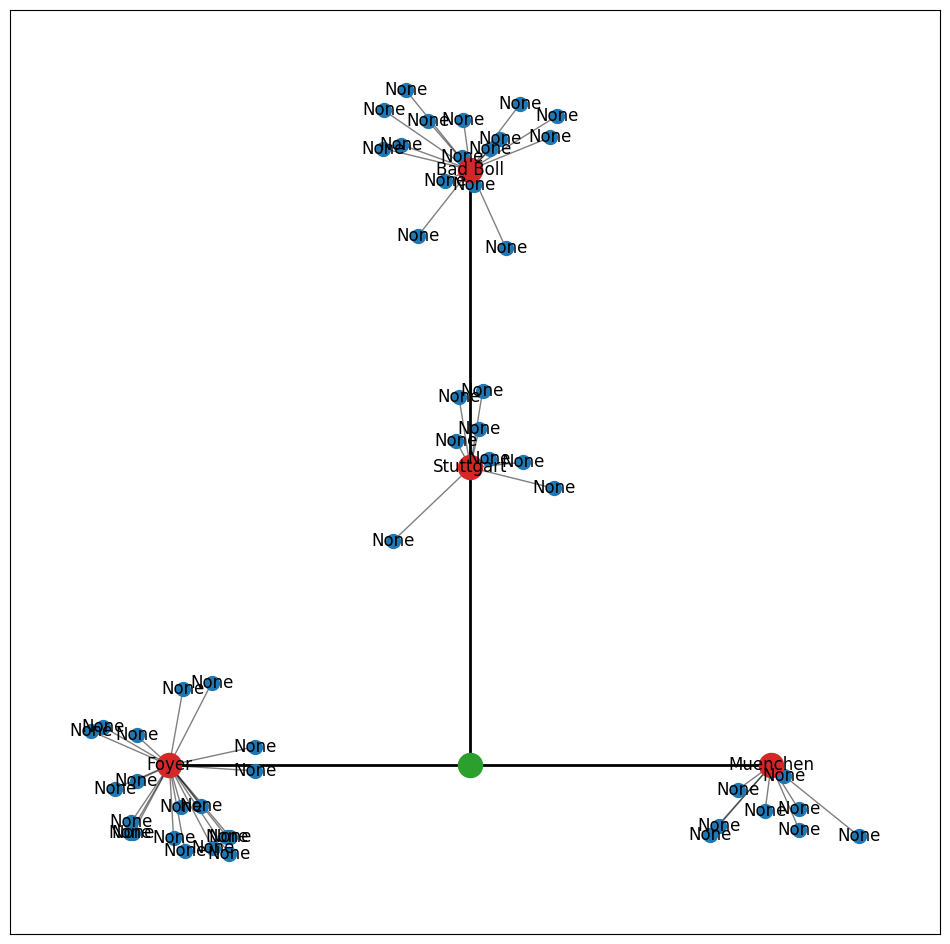

In [7]:
plot_graph(G)

In [8]:
nx.write_gml(G, "./sample_inputs/graph_without_poster_assignment.gml")

In [9]:
posters_with_labels = {}
poster_counter = 0
for poster in posters:
    name, kw1, kw2 = poster_names[poster_counter], keywords_1[poster_counter], keywords_2[poster_counter]
    attrs = {
        "pos": poster[1]["pos"],
        "name": name,
        "kw_1": kw1,
        "kw_2": kw2,
        "timeslot": "None",
        "attendence": [True, True, True]
    }
    poster = {f"poster_{poster_counter:03d}": attrs}
    posters_with_labels.update(poster)
    poster_counter += 1

nx.set_node_attributes(G, posters_with_labels)

/tmp/ipykernel_3801/2519925971.py:19: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=2.0, alpha=1.0, edgelist=room_edges)


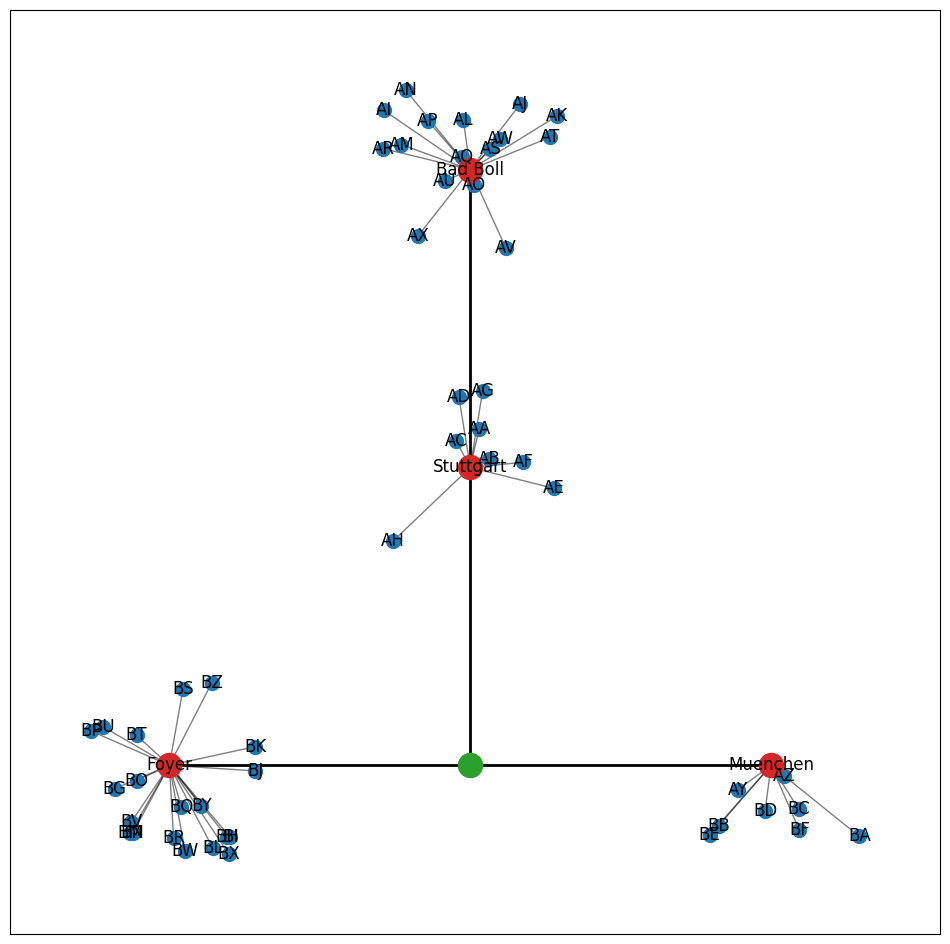

In [10]:
plot_graph(G)

In [11]:
nx.write_gml(G, "./sample_inputs/graph_with_random_poster_assignment.gml")

In [12]:
G_restored = nx.read_gml("./sample_inputs/graph_with_random_poster_assignment.gml")
G_restored

/tmp/ipykernel_14900/2519925971.py:19: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, width=2.0, alpha=1.0, edgelist=room_edges)


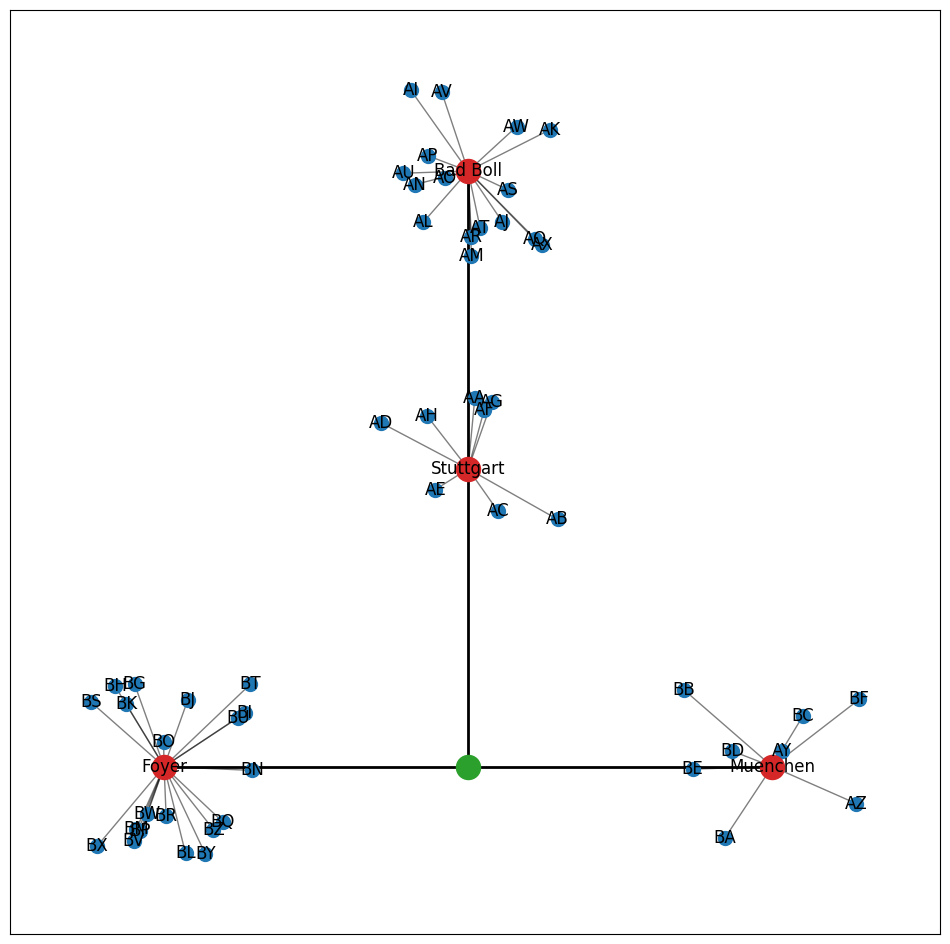

In [39]:
plot_graph(G_restored)

In [41]:
nx.shortest_path_length(G, source="room_02", target="room_01", weight="distance")

3.0